In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/AMLP2023-new'

/content/drive/MyDrive/AMLP2023-new


In [ ]:
!git clone https://github.com/andreagiussani/Applied_Machine_Learning_with_Python.git

fatal: destination path 'Applied_Machine_Learning_with_Python' already exists and is not an empty directory.


In [ ]:
%cd Applied_Machine_Learning_with_Python

/content/drive/MyDrive/AMLP2023-new/Applied_Machine_Learning_with_Python


In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=03b928a6f672bb457f528dcf3c75e8e202f84f87c9d89a892207ca28558e7215
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
from egeaML.egeaML import DataIngestion
raw_data = DataIngestion(
    df='https://raw.githubusercontent.com/andreagiussani/Applied_Machine_Learning_with_Python/master/data/boston.csv',
    col_target='MEDV'
)
df = raw_data.load_data()

In [ ]:
X = raw_data.features()
y = raw_data.target()

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

In [ ]:
# split data into 80-20 strategy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)

(404, 13) (404,)


In [ ]:
506*0.8

404.8

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=list(X_train))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_scaled, y_train)

LinearRegression()

In [ ]:
lr.score(X_scaled, y_train)

0.7508856358979672

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_train_pred = lr.predict(X_scaled)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


In [ ]:
print(f'RMSE Training phase: {rmse_train}')

RMSE Training phase: 4.6520331848801675


In [ ]:
# Pipeline
from sklearn.pipeline import Pipeline
my_pipe = Pipeline(
  steps = [
      ('scaler', StandardScaler()),
      ('lr', LinearRegression())
          ]
)

In [ ]:
my_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [ ]:
y_pipe_pred = my_pipe.predict(X_train)
rmse_pipe = np.sqrt(mean_squared_error(y_train, y_pipe_pred))
print(f'RMSE Training phase: {rmse_pipe}')

RMSE Training phase: 4.6520331848801675


In [ ]:
X_test.head(2)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.5,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.9,3.53


In [ ]:
# scaling data
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=list(X_test))

In [ ]:
# predict
y_pred = lr.predict(X_test_scaled)

In [ ]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = lr.score(X_test_scaled, y_test)

In [ ]:
print(f'RMSE Test phase: {rmse_test}')
print(f'R2 Test phase: {r2_test}')

RMSE Test phase: 4.928602182665337
R2 Test phase: 0.668759493535632


In [ ]:
# Translate results
error = y_test - y_pred

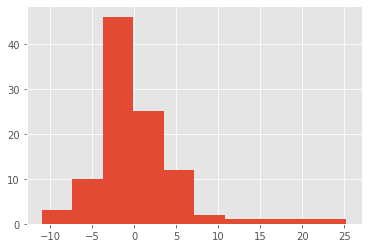

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(error)
plt.show()

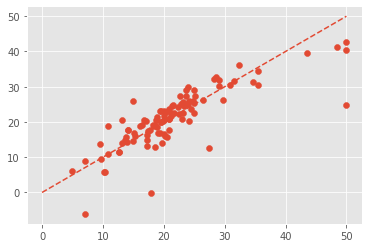

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0,50], [0,50], linestyle= '--')
plt.show()

## Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, X_train, y_train, cv=10)
print(f'Average 10-folds CV Score: {np.mean(cv_scores)}')

Average 10-folds CV Score: 0.6986644490108913


## Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
my_pipe = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('ridge', Ridge()),
    ]

)

In [ ]:
my_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
my_pipe.score(X_test, y_test)

0.6684624359643558

In [ ]:
alpha_grid = np.linspace(-3,3, 10)

In [ ]:
print(alpha_grid)

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]


In [ ]:
coef_list = []
ridge = Ridge()
for alpha in alpha_grid:
  ridge.set_params(alpha=alpha)
  ridge.fit(X_train, y_train)
  print(ridge.coef_)
  print('='*10)
  coef_list.append(ridge.coef_)

[-0.09617007  0.03718618 -0.08697064  2.53717917 12.32044681  4.8178886
 -0.03171635 -1.02055815  0.19613025 -0.01331896 -0.55855153  0.01352736
 -0.54438208]
[-9.23632122e-02  3.92752730e-02 -1.19230903e-01  2.31231669e+00
  1.98658531e+01  4.85461997e+00 -3.76187590e-02 -9.13104262e-01
  1.82387282e-01 -1.41206672e-02 -4.72422675e-01  1.38190793e-02
 -5.58578241e-01]
[-7.56216439e-02  4.75911377e-02 -2.54870202e-01  1.62759345e+00
  5.14626764e+01  5.09873499e+00 -6.32375751e-02 -4.60266492e-01
  1.19889695e-01 -1.72930551e-02 -1.03879415e-01  1.50513257e-02
 -6.10360496e-01]
[-1.50033419e-01  1.19456844e-02  3.38535270e-01  4.22331419e+00
 -8.66145918e+01  3.88211915e+00  5.01921114e-02 -2.44343325e+00
  4.00916519e-01 -3.72281233e-03 -1.72697525e+00  9.64324607e-03
 -3.96598122e-01]
[-1.16326131e-01  2.84239989e-02  6.73313189e-02  2.93764284e+00
 -2.34812589e+01  4.39835719e+00 -1.28197350e-03 -1.53768961e+00
  2.74465607e-01 -1.00025832e-02 -9.88084549e-01  1.21084774e-02
 -4.976

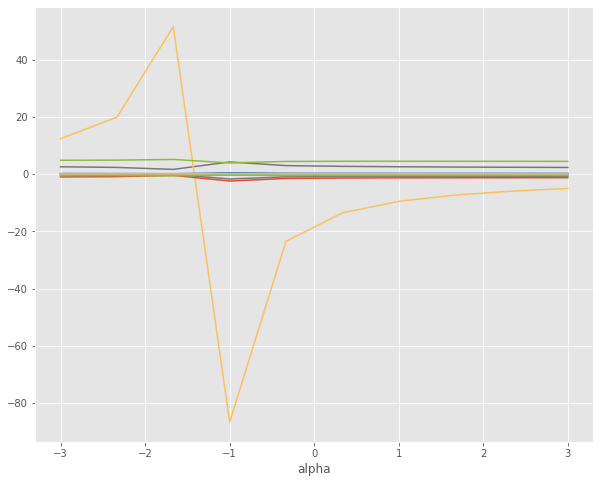

In [ ]:
import matplotlib.pyplot as plt
fix, ax = plt.subplots(figsize=(10,8))
ax.plot(alpha_grid, coef_list)
ax.set_xlabel('alpha')
plt.show()

In [ ]:
# Grid Search Cross Validation
# my mistake:  i fit a ridge without scaling
# YOU can try to do:
# - Pipeline with StandardScaler and Ridge
# - GridSearchCV by passing the pipeline instead of the model itself
# - Compute the best_estimator and perform, prediction on the X_test

In [ ]:
ridge = Ridge()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = {'alpha': np.linspace(-3,3,10)}
grid_search_cv = GridSearchCV(ridge, param_grid=grid_param, cv=10, n_jobs=-1)

In [ ]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])})

In [ ]:
grid_search_cv.best_estimator_

Ridge(alpha=0.33333333333333304)

In [ ]:
grid_search_cv.best_score_

0.6977037265922451

In [ ]:
y_pred = grid_search_cv.best_estimator_.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.93381137832707

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
alpha_grid = np.linspace(-3,3, 10)

In [ ]:
coef_list = []
lasso = Lasso(normalize=True)
for alpha in alpha_grid:
  lasso.set_params(alpha=alpha)
  lasso.fit(X_train, y_train)
  print(lasso.coef_)
  print('='*10)
  coef_list.append(lasso.coef_)

[-1.97883775e+01  1.73585706e+01  5.53969527e+01 -4.96171144e+02
  2.12522410e+03  2.70405207e+02 -1.31560404e+01 -1.58147865e+02
  1.05965927e+02 -7.31572735e+00  9.14615226e+01  1.33086169e+00
  3.29782364e+01]
[-1.54160800e+01  1.35078011e+01  4.30954850e+01 -3.85292107e+02
  1.64912978e+03  2.11301585e+02 -1.02338749e+01 -1.23325635e+02
  8.24762390e+01 -5.69237526e+00  7.09333177e+01  1.03785933e+00
  2.55367223e+01]
[-1.10437824e+01  9.65703166e+00  3.07940173e+01 -2.74413069e+02
  1.17303545e+03  1.52197963e+02 -7.31170935e+00 -8.85034053e+01
  5.89865512e+01 -4.06902317e+00  5.04051128e+01  7.44856974e-01
  1.80952082e+01]
[-6.67150039e+00  5.80619530e+00  1.84924919e+01 -1.63532049e+02
  6.96909153e+02  9.30963210e+01 -4.38962397e+00 -5.36818559e+01
  3.54966255e+01 -2.44564918e+00  2.98765390e+01  4.51853962e-01
  1.06540744e+01]
[-2.31794564e+00  1.01223929e+00  9.47866475e+00 -5.00778656e+01
 -3.62278191e+02 -4.27686953e+01  1.72550780e+00  7.04979521e+00
  1.56808975e+01 -

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

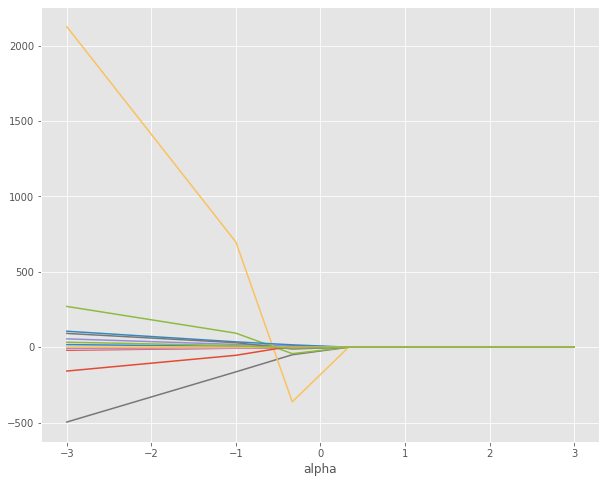

In [ ]:
import matplotlib.pyplot as plt
fix, ax = plt.subplots(figsize=(10,8))
ax.plot(alpha_grid, coef_list)
ax.set_xlabel('alpha')
plt.show()

In [ ]:
lasso = Lasso(normalize=True)
# alpha_grid = np.linspace(-3,3, 10)
alpha_grid = np.logspace(-3,3, 10)
parma_grid = {'alpha': alpha_grid}
grid_searc_lasso = GridSearchCV(lasso, parma_grid, cv=10, n_jobs=-1)

In [ ]:
grid_searc_lasso.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


GridSearchCV(cv=10, estimator=Lasso(normalize=True), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])})

In [ ]:
best_estimator = grid_searc_lasso.best_estimator_

In [ ]:
best_estimator.coef_

array([-1.06781989e-01,  2.57982021e-02,  1.38952336e-02,  2.79489059e+00,
       -1.61251309e+01,  4.45641511e+00, -4.65746910e-03, -1.38154924e+00,
        2.20360403e-01, -8.47818644e-03, -8.98828574e-01,  1.20897595e-02,
       -5.07896946e-01])

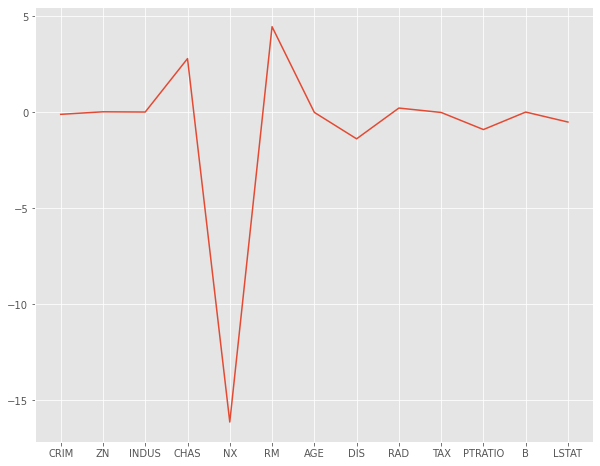

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(list(X_train), best_estimator.coef_)
plt.show()

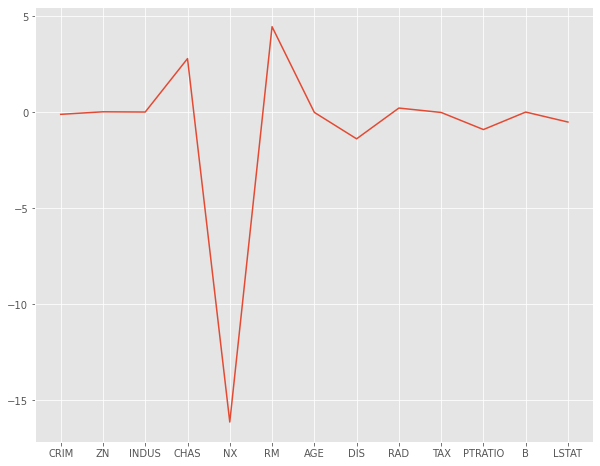

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(list(X_train), best_estimator.coef_)
plt.show()

# Logistic Regression

In [ ]:
from egeaML.egeaML import DataIngestion
raw_data = DataIngestion(
    df='https://raw.githubusercontent.com/andreagiussani/Applied_Machine_Learning_with_Python/master/data/diabetes.csv',
    col_target='diabetes'
)
df = raw_data.load_data()

In [ ]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [ ]:
X = raw_data.features()
y = raw_data.target()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'max_iter': [100, 500, 1000, 10000],
    'C': np.logspace(-3,3,10),
}

lr = LogisticRegression()

cv = GridSearchCV(lr, param_grid, cv=10, n_jobs=-1)

In [ ]:
cv.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'max_iter': [100, 500, 1000, 10000]})

In [ ]:
best_estimator = cv.best_estimator_

In [ ]:
y_pred = best_estimator.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



## End